# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.121409e+01     6.865118e+00
 * time: 0.004286050796508789
     1     3.075318e+01     6.326538e+00
 * time: 0.012553215026855469
     2     2.611942e+01     7.555420e+00
 * time: 0.032235145568847656
     3     2.176654e+01     6.259997e+00
 * time: 0.05390501022338867
     4     1.654899e+01     4.374254e+00
 * time: 0.07408714294433594
     5     1.251254e+01     1.655331e+00
 * time: 0.09084510803222656
     6     1.145558e+01     2.386988e+00
 * time: 0.10443115234375
     7     1.052260e+01     1.224413e+00
 * time: 0.1180410385131836
     8     1.009876e+01     1.257800e+00
 * time: 0.13152503967285156
     9     9.795664e+00     7.378206e-01
 * time: 0.14489316940307617
    10     9.507779e+00     1.102808e+00
 * time: 0.15897107124328613
    11     9.271110e+00     6.066882e-01
 * time: 0.1734151840209961
    12     9.091227e+00     6.260217e-01
 * time: 0.18808221817016602
    13     9.003015e+00     5.208559e-01
 * time: 0

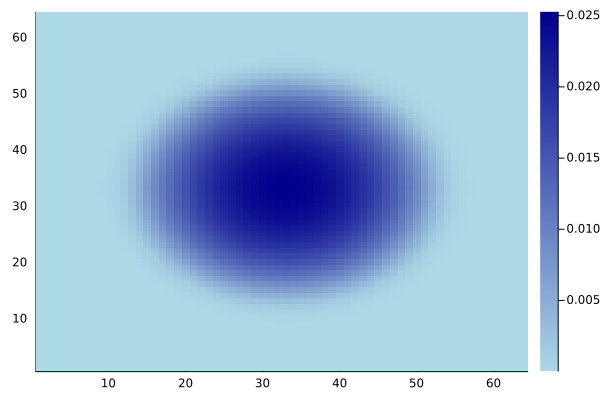

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)